In [441]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [665]:
import numpy as np
import h5py
from scipy.linalg import expm, det
import scipy.linalg 
import matplotlib.pyplot as plt
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]


In [685]:
L=2
#filename1 = '/Users/julianthoenniss/Documents/PhD/data/Fermi_seaFS_Jx=0.499999_Jy=0.5_g=0.0_del_t=0.05_beta=1.0_L=' + str(L)
filename1 = '/Users/julianthoenniss/Documents/PhD/data/FS_Jx=0.3_Jy=0.5_g=0.0mu=0_del_t=1.0_beta=5.0_L=2'
#filename1 = '/Users/julianthoenniss/Documents/PhD/data/bound_Lohschmidt_Jx=0.31_Jy=0.0_g=0.7853981633974483_del_t=1_beta=1.0_L=24'
#filename1 = '/Users/julianthoenniss/Documents/PhD/data/FS_Jx=0.499999_Jy=0.5_g=0.0_del_t=0.1_beta=1.0_L=' + str(L)

In [686]:
iterator = 19
iterator=3

times = []
time_step = 0
with h5py.File(filename1 + '.hdf5', 'r') as f:
    data_entr = f['temp_entr']
    times = data_entr[:,0]
    time_step = int(times[iterator])

max_time = int(max(times))
print('time step:', time_step)
print('maximal time:', max_time)

time step: 4
maximal time: 5


In [687]:
B = np.zeros((4*time_step,4*time_step), dtype=np.complex_)
A_inv = np.zeros((4*time_step,4*time_step), dtype=np.complex_)

with h5py.File(filename1 + '.hdf5', 'r') as f:
    data_IM = f['IM_exponent']
    
    B[:,:] = data_IM[iterator,:4*time_step,:4*time_step]

In [555]:
rot = np.zeros(B.shape)
print(B.shape)

for i in range(0,4*time_step, 2):
    rot[i,i] = 1./np.sqrt(2)
    rot[i,i+1] = 1./np.sqrt(2)
    rot[i+1,i] = - 1./np.sqrt(2) * np.sign(2*time_step - i-1)
    rot[i+1,i+1] = 1./np.sqrt(2) * np.sign(2*time_step - i-1)

B_rot = rot @ B @ rot.T



(64, 64)


No handles with labels found to put in legend.


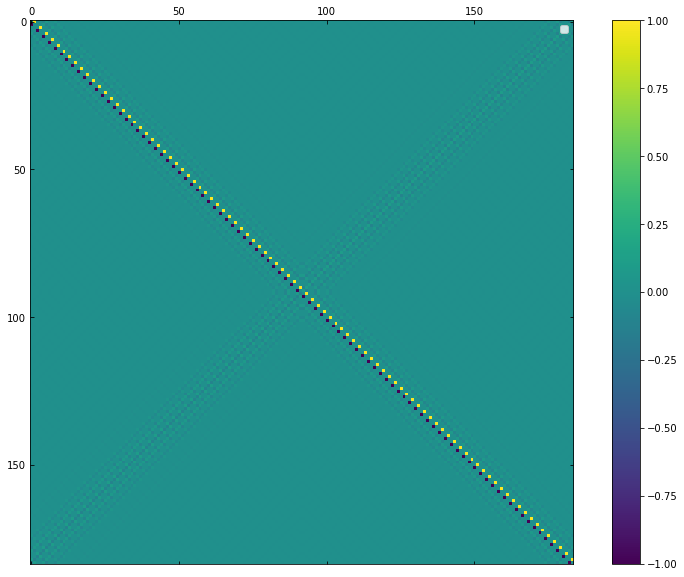

In [438]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 10]

im = ax.matshow(np.real(B))
fig.colorbar( im, orientation='vertical')
im.set_clim(-1,1)
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.legend(loc="upper right")

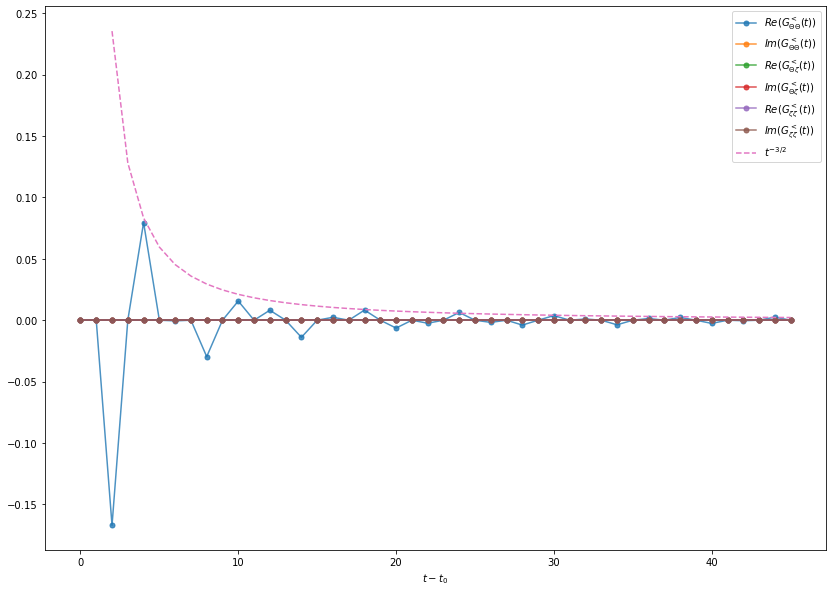

In [482]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [14, 10]

ax.set_xlabel(r'$t-t_0$')

Gl_ThTh= []
Gl_ThZ= []
Gl_ZZ= []

for tau in range (2*(time_step)-1, -1, -2):
    Gl_ThTh.append(B_rot[tau, 2*time_step-1])
    Gl_ThZ.append(B_rot[tau, 2*time_step])
    Gl_ZZ.append(B_rot[tau+1, 2*time_step])




#ax.set_ylim([1.e-16,1.2])
#ax.set_xscale('log')
#ax.set_yscale('log')

ax.plot( np.arange(len(Gl_ThTh)), zero_to_nan((np.real(Gl_ThTh))), label=r'$Re(G^<_{\Theta\Theta}(t))$', marker='o', alpha=.8, ms=5)
ax.plot( np.arange(len(Gl_ThTh)), zero_to_nan((np.imag(Gl_ThTh))), label=r'$Im(G^<_{\Theta\Theta}(t))$', marker='o', alpha=.8, ms=5)
ax.plot( np.arange(len(Gl_ThZ)), zero_to_nan((np.real(Gl_ThZ))), label=r'$Re(G^<_{\Theta\zeta}(t))$', marker='o', alpha=.8, ms=5)
ax.plot( np.arange(len(Gl_ThZ)), zero_to_nan((np.imag(Gl_ThZ))), label=r'$Im(G^<_{\Theta\zeta}(t))$', marker='o', alpha=.8, ms=5)
ax.plot( np.arange(len(Gl_ZZ)), zero_to_nan((np.real(Gl_ThZ))), label=r'$Re(G^<_{\zeta\zeta}(t))$', marker='o', alpha=.8, ms=5)
ax.plot( np.arange(len(Gl_ZZ)), zero_to_nan((np.imag(Gl_ThZ))), label=r'$Im(G^<_{\zeta\zeta}(t))$', marker='o', alpha=.8, ms=5)
ax.plot(np.arange(2,len(Gl_ThZ)), 0.666 * np.arange(2,len(Gl_ThZ), dtype=float)**(-1.5), '--',label= r'$t^{-3/2}$')

ax.legend(loc="upper right")

plt.savefig('/Users/julianthoenniss/Documents/PhD/data/Correlation_functions_FermiSea' + '_L=68.pdf')

Spin Trajectory

In [689]:
#constant Blip 
print(B)

determ = det(B)
print(determ)


#ax.plot( np.arange(len(IM_trajec)), zero_to_nan(np.real(IM_trajec)), label=r'$Re(G^<_{\Theta\Theta}(t))$', marker='o', alpha=.8, ms=5)
#ax.plot( np.arange(len(IM_trajec)), zero_to_nan(np.imag(IM_trajec)), label=r'$Re(G^<_{\Theta\Theta}(t))$', marker='o', alpha=.8, ms=5)

ax.legend(loc="upper right")



[[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j
   0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.